KMeans Clustering

In [2]:
#Import Packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
from sklearn.cluster import KMeans 

In [3]:
#load in data 
pokemon = pd.read_csv("../Data/300k.csv", low_memory=False)

In [4]:
pokemon

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,...,False,False,False,False,False,False,False,False,False,16
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,...,False,False,False,False,False,False,False,False,False,133
2,16,38.903590,-77.199780,2016-09-08T03:57:25,NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,...,False,False,False,False,False,False,False,False,False,16
3,13,47.665903,-122.312561,2016-09-08T03:56:22,NTU2MTU1NDM4NzA2MDk1MDcxNw==,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,...,False,False,False,False,False,False,False,False,False,13
4,133,47.666454,-122.311628,2016-09-08T03:56:08,MTY2ODg4MTAzMTczMDE0MTUwNTM=,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,...,False,False,False,False,False,False,False,False,False,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296016,19,39.119052,-76.633194,2016-09-02T21:50:11,MzM1MzA0NjEyNTIxNTQ1OTY5Mw==,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,...,False,False,False,False,False,False,False,False,False,19
296017,13,47.142237,7.244752,2016-09-02T21:50:08,NjA0NDc3OTcxMzk2NjM5MzgyMQ==,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,...,False,False,False,False,False,False,False,False,False,13
296018,16,42.258532,-87.881248,2016-09-02T21:50:07,OTIzODI4ODYyOTUyMjI4NzI0NQ==,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,...,False,False,False,False,False,False,False,False,False,16
296019,19,26.230929,-98.194772,2016-09-02T21:50:07,MTcwMjEwNDQ3Mjk1MjIwOTM5NDk=,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,...,False,False,False,False,False,False,False,False,False,19


Data Wrangling 

In [5]:
def city (series):
    if series == "Adelaide":
        return 0
    if series == "Amman":
        return 1 
    if series == "Amsterdam":
        return 2 
    if series == "Athens":
        return 3
    if series == "Auckland":
        return 4 
    if series == "Bahai":
        return 5 
    if series == "Bangkok":
        return 6
    if series == "Belem":
        return 7
    if series == "Berlin":
        return 8
    if series == "Bogota":
        return 9 
    if series == "Boise":
        return 10
    if series == "Bratislava":
        return 11 
    if series == "Bribane":
        return 12 
    if series == "Brunie":
        return 13
    if series == "Bussels":
        return 14
    if series == "Bucharest":
        return 15
    if series == "Buenos_Aires":
        return 16
    if series == "Cairo":
        return 17 
    if series == "Casablanca":
        return 18
    if series == "Chicago":
        return 19
    if series == "Copenhagen":
        return 20
    if series == "Cordoba":
        return 21
    if series == "Costa_Rica":
        return 22 
    if series == "Damascus":
        return 23
    if series == "Denver":
        return 24 
    if series == "Detroit":
        return 25 
    if series == "Dubia":
        return 26
    if series == "Dublin":
        return 27 
    if series == "Edmonton":
        return 28
    if series == "Fortaleza":
        return 29 
    if series == "Guam":
        return 30 
    if series == "Guayaquil":
        return 31
    if series == "Guyana":
        return 32
    if series == "Halifax":
        return 33 
    if series == "Helsinki":
        return 34 
    if series == "Ho_Chi_Minh":
        return 35
    if series == "Hobart":
        return 36
    if series == "Hong_Kong":
        return 37
    if series == "Honolulu":
        return 38
    if series == "Indianapolis":
        return 39
    if series == "Isle_of_Man":
        return 40
    if series == "Istanbul":
        return 41
    if series == "Jakarta":
        return 42
    if series == "Jerusalem":
        return 43
    if series == "Karachi":
        return 44
    if series == "Kiev":
        return 45 
    if series == "Kolkata":
        return 46
    if series == "Kuala_Lumpur":
        return 47
    if series == "Kuching":
        return 48
    if series == "Lisbon":
        return 49
    if series == "Ljubljana":
        return 50
    if series == "London":
        return 51
    if series == "Los_Angeles":
        return 52
    if series == "Louisville":
        return 53
    if series == "Luanda":
        return 54
    if series == "Luxembourg":
        return 56
    if series == "Madrid":
        return 57
    if series == "Manila":
        return 58
    if series == "Melbourne":
        return 59
    if series == "Monrovia":
        return 60
    if series == "Mexico_City":
        return 61
    if series == "Monterrey":
        return 62
    if series == "Montreal":
        return 63
    if series == "Moscow":
        return 64
    if series == "New_York":
        return 65
    if series == "Olso":
        return 66
    if series == "Nicosia":
        return 67
    if series == "Narobi":
        return 68
    if series == "Noumea":
        return 69
    if series == "Paris":
        return 70
    if series == "Perth":
        return 71
    if series == "Phnom_Penh":
        return 72
    if series == "Phoenix":
        return 73
    if series == "Prague":
        return 74
    if series == "Puerto_Rico":
        return 75
    if series == "Regina":
        return 76
    if series == "Reykjavik":
        return 77
    if series == "Rome":
        return 78
    if series == "Santiago":
        return 79
    if series == "Sao_Paulo":
        return 80
    if series == "Sarajevo":
        return 81
    if series == "Singapore":
        return 82
    if series == "Stockholm":
        return 83 
    if series == "Sydney":
        return 84
    if series == "Tahiti":
        return 85
    if series == "Taipei":
        return 86
    if series == "Tokyo":
        return 87
    if series == "Toronto":
        return 88
    if series == "Tripoli":
        return 89
    if series == "Tunis":
        return 90
    if series == "Vancouver":
        return 91
    if series == "Vienna":
        return 92
    if series == "Vilnius":
        return 93
    if series == "Warsaw":
        return 94
    if series == "Winnipeg":
        return 95
    if series == "Zagreb":
        return 96
    if series == "Zurich":
        return 97

In [6]:
pokemon['cityR'] = pokemon['city'].apply(city)
pokemon

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,...,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class,cityR
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,...,False,False,False,False,False,False,False,False,16,61.0
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,...,False,False,False,False,False,False,False,False,133,61.0
2,16,38.903590,-77.199780,2016-09-08T03:57:25,NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,...,False,False,False,False,False,False,False,False,16,65.0
3,13,47.665903,-122.312561,2016-09-08T03:56:22,NTU2MTU1NDM4NzA2MDk1MDcxNw==,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,...,False,False,False,False,False,False,False,False,13,52.0
4,133,47.666454,-122.311628,2016-09-08T03:56:08,MTY2ODg4MTAzMTczMDE0MTUwNTM=,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,...,False,False,False,False,False,False,False,False,133,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296016,19,39.119052,-76.633194,2016-09-02T21:50:11,MzM1MzA0NjEyNTIxNTQ1OTY5Mw==,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,...,False,False,False,False,False,False,False,False,19,65.0
296017,13,47.142237,7.244752,2016-09-02T21:50:08,NjA0NDc3OTcxMzk2NjM5MzgyMQ==,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,...,False,False,False,False,False,False,False,False,13,97.0
296018,16,42.258532,-87.881248,2016-09-02T21:50:07,OTIzODI4ODYyOTUyMjI4NzI0NQ==,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,...,False,False,False,False,False,False,False,False,16,19.0
296019,19,26.230929,-98.194772,2016-09-02T21:50:07,MTcwMjEwNDQ3Mjk1MjIwOTM5NDk=,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,...,False,False,False,False,False,False,False,False,19,19.0


In [7]:
pokemon.dtypes

pokemonId              int64
latitude             float64
longitude            float64
appearedLocalTime     object
_id                   object
                      ...   
cooc_149                bool
cooc_150                bool
cooc_151                bool
class                  int64
cityR                float64
Length: 209, dtype: object

In [8]:
pokemoncut = pokemon.drop(['appearedLocalTime', '_id', 'appearedTimeOfDay', 'appearedDayOfWeek', 'closeToWater',
                          'continent', 'weather', 'temperature', 'windSpeed', 'windBearing', 'pressure', 'weatherIcon',
                          'urban', 'suburban', 'midurban', 'rural', 'gymIn100m', 'gymIn250m', 'gymIn500m', 'gymIn1000m',
                          'gymIn2500m', 'gymIn5000m', 'pokestopIn100m', 'pokestopIn250m', 'pokestopIn500m', 'pokestopIn1000m',
                          'pokestopIn2500m', 'pokestopIn5000m', 'pokemonId'], axis=1)

In [9]:
pokemoncut.dropna(inplace=True)

In [10]:
pokemoncut

,latitude,longitude,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,cellId_2920m,cellId_5850m,appearedHour,...,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class,cityR
0,20.525745,-97.460829,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,5,...,False,False,False,False,False,False,False,False,16,61.0
1,20.523695,-97.461167,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,5,...,False,False,False,False,False,False,False,False,133,61.0
2,38.903590,-77.199780,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,9.923200e+18,5,...,False,False,False,False,False,False,False,False,16,65.0
3,47.665903,-122.312561,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,5,...,False,False,False,False,False,False,False,False,13,52.0
4,47.666454,-122.311628,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,6.093390e+18,5,...,False,False,False,False,False,False,False,False,133,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296016,39.119052,-76.633194,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,9.923680e+18,23,...,False,False,False,False,False,False,False,False,19,65.0
296017,47.142237,7.244752,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,5.156090e+18,23,...,False,False,False,False,False,False,False,False,13,97.0
296018,42.258532,-87.881248,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,9.804220e+18,23,...,False,False,False,False,False,False,False,False,16,19.0
296019,26.230929,-98.194772,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,9.684320e+18,23,...,False,False,False,False,False,False,False,False,19,19.0


In [11]:
pokemoncut.dtypes

latitude       float64
longitude      float64
cellId_90m     float64
cellId_180m    float64
cellId_370m    float64
                ...   
cooc_149          bool
cooc_150          bool
cooc_151          bool
class            int64
cityR          float64
Length: 180, dtype: object

In [12]:
pokemoncut = pokemoncut.reindex(columns=['cityR' ,'latitude', 'longitude', 'pokemonId', 'cellId_90m' ,'cellId_180m',
                                         'cellId_370m', 'cellId_730m', 'cellId_1460m','cellId_2920m', 'cellId_2920m'])

In [4]:
pokemoncut.latitude = pokemoncut.latitude.astype(int)
pokemoncut.longitude = pokemoncut.longitude.astype(int)
pokemoncut.cityR = pokemoncut.cityR.astype(int)

NameError: name 'pokemoncut' is not defined

In [5]:
pokemoncut.cellId_90m = pokemoncut.cellId_90m.astype(int)
pokemoncut.cellId_180m = pokemoncut.cellId_180m.astype(int)
pokemoncut.cellId_370m = pokemoncut.cellId_370m.astype(int)
pokemoncut.cellId_730m = pokemoncut.cellId_730m.astype(int)
pokemoncut.cellId_1460m = pokemoncut.cellId_1460m.astype(int)
pokemoncut.cellId_2920m = pokemoncut.cellId_2920m.astype(int)


NameError: name 'pokemoncut' is not defined

Perform K-Means 

In [15]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pokemoncut)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

AttributeError: 'KMeans' object has no attribute 'labels_'

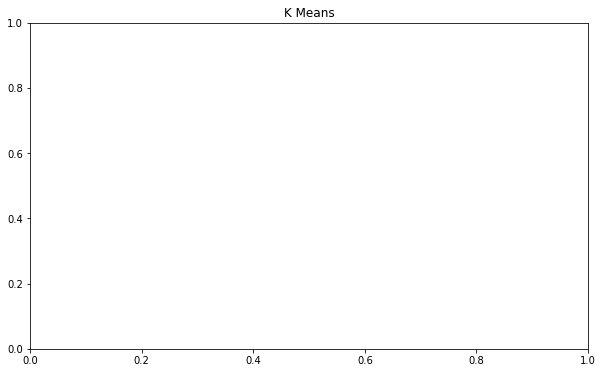

In [16]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(pokemoncut['pokemonId'], pokemoncut['cityR'], c=kmeans.labels_, cmap='viridis')

In [39]:
kmeans.labels_

AttributeError: 'KMeans' object has no attribute 'labels_'

In [40]:
pokemoncut['Group'] = kmeans.labels_

AttributeError: 'KMeans' object has no attribute 'labels_'

In [41]:
kmeans.cluster_centers_

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [42]:
kmeans.inertia_

AttributeError: 'KMeans' object has no attribute 'inertia_'

K nearest Neighbors

Import Packages

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
scaler = StandardScaler()
scaler.fit(pokemoncut.drop('cityR', axis=1))
scaledVariables = scaler.transform(pokemoncut.drop('cityR', axis=1))
pokemoncutScaled = pd.DataFrame(scaledVariables, columns=pokemoncut.columns[:-1])

C:\Python3\lib\site-packages\sklearn\utils\extmath.py:981: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Python3\lib\site-packages\sklearn\utils\extmath.py:986: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Python3\lib\site-packages\sklearn\utils\extmath.py:1006: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [45]:
x = pokemoncutScaled 
y = pokemoncut['cityR']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print(confusion_matrix(y_test, pred))

In [ ]:
print(classification_report(y_test, pred))

Choose the best model 

In [27]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))